
# kv2320
# 12/13/21
# This file contains Project 3, analysis of the Govt of India's official memos on vaccines and immunity during the Covid-19 pandemic


In [528]:
import nltk
nltk.download('averaged_perceptron_tagger')
import requests
import string
import random

from readability import Readability

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.decomposition import PCA
from nltk.corpus import nps_chat
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

from nltk.corpus import wordnet as wn

import matplotlib.pyplot as pl

import networkx as nx

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/karuna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [529]:
#opening and reading text file
with open('1002Project3IndiaCovid.txt') as f:
    IndiaVaxRaw = f.read()

In [530]:
#cleaning the text
#no other paratext or table of contents
IndiaVaxRaw = IndiaVaxRaw.replace('', '')
IndiaVaxRaw = IndiaVaxRaw.replace('●', '')
IndiaVaxRaw = IndiaVaxRaw.replace('▪', '')
IndiaVaxRaw = IndiaVaxRaw.replace('*****', '')
IndiaVaxRaw = IndiaVaxRaw.replace('●', '')

In [531]:
IndiaVaxRaw[:200] #checking to see the text was opened correctly

'TEXT 1 PREGNANT WOMEN\n1 FAQs on COVID-19 Vaccines and Vaccination Program A. GENERAL 1. Which COVID-19 vaccines are licenced and used in the country at present for COVID Vaccination? Three vaccines th'

In [532]:
#dividing the text into 5 sections
start = IndiaVaxRaw.index('TEXT 1 PREGNANT WOMEN') #each text was marked at its start in the original file
end = IndiaVaxRaw.index('TEXT 2 REVISED NATIONAL GUIDELINES') #using those markings to split the text 
pregnantWomen = IndiaVaxRaw[start: end]

start = IndiaVaxRaw.index('TEXT 2 REVISED NATIONAL GUIDELINES') 
end = IndiaVaxRaw.index('TEXT 3 ELDERLY AND DIFFERENTLY ABLED') 
nationalGuidelines = IndiaVaxRaw[start: end]

start = IndiaVaxRaw.index('TEXT 3 ELDERLY AND DIFFERENTLY ABLED') 
end = IndiaVaxRaw.index('TEXT 4 WITHOUT ID') 
elderly = IndiaVaxRaw[start: end]

start = IndiaVaxRaw.index('TEXT 4 WITHOUT ID') 
end = IndiaVaxRaw.index('TEXT 5 IMMUNITY AYUSH') 
ID = IndiaVaxRaw[start: end]

start = IndiaVaxRaw.index('TEXT 1 PREGNANT WOMEN') 
end = IndiaVaxRaw.index('TEXT 5 IMMUNITY AYUSH') 
ayush = IndiaVaxRaw[start: end]

In [533]:
#creating the corpus of India memos on Covid vaccination by loading the individual memos into a dictionary
IndiaVax = {}
IndiaVax['pregnantWomen']= pregnantWomen 
IndiaVax['nationalGuidelines']= nationalGuidelines
IndiaVax['elderly']= elderly
IndiaVax['ID']= ID
IndiaVax['ayush']= ayush

In [534]:
#this function randomly slices 200 characters of inputted text
def randomSlicing(text):
    a = len(text) - 201 #to make sure the starting point is at least 200 characters from the end
    b = int(random.randrange(0, a)) #random int between 0 and a    
    c = b + 200 #200 charecters from a
    text = text[b:c] #slice
    print(text)

In [535]:
randomSlicing(pregnantWomen)

cess for vaccination at Public & Private CVCs. In both cases, beneficiaries need to register on Co-WIN. The various modes of registration include:  Online registration and appointment  On-site or walk


In [536]:
randomSlicing(nationalGuidelines)

stration facility, available both for individuals as well as groups of individuals, for which detailed procedure is to be finalized and published by States/UTs, in order to minimize any inconvenience 


In [537]:
randomSlicing(elderly)

 Corporation will coordinate with relevant stakeholders such as Resident Welfare Associations (RWAs), Cantonment Board, Public/ Private Establishments to enlist target populations as defined above. o 


In [538]:
randomSlicing(ID)

and should be utilized for shifting beneficiaries to the linked AEFI management center, if required. o The district authorities will ensure the availability of logistics including IT infrastructure fo


In [539]:
randomSlicing(ayush)

 5 particles containing SARS-CoV-2 protein S gene. Excipients: Tris (hydroxymethyl) aminomethane, sodium chloride, sucrose, magnesium chloride hexahydrate, EDTA disodium salt dihydrate, polysorbate-80


This corpus is collection of memos from the Ministry of Health and Family Welfare in the Government of India. They were accessed here:https://www.mohfw.gov.in/ The government has released many memos over the course of the COVID-19 pandemic dealing from how to social distance to how to dispose of dead bodies of infected persons from the home. This corpus though contains documents specifically about vaccines, vaccine hesitancy, vaccine access, and immunity. The five texts that are included pretty span the 10 months that vaccines have been rolled out in India. From oldest to newest they are ayush, ID, elderly, nationalGuidelines, and pregnantWomen. I tried to to address five separate issues pertinent to vaccination in my choice of texts. Ayush deals with immunity, specifically home remedies and Ayurveda and immunity. The government seems to be promoting certain home remedies as able to help safeguard somewhat against Covid. ID is about government policies outlining how migrant populations without IDs can still access vaccines. Elderly is about special plans for vaccination drives to be accessible to the elderly and differently abled populations. NationalGuidelines is the most broad, encapsulating the broad guidelines of the govt of India with respect to its vaccine policy. Finally, pregnantWomen outlines the health risks pregnantWomen might face if they take the vaccine.

These are government documents, so the language is straightfoward but inelegant. There are no idioms or other illustrative or flowery language. The text plainly means what it says.

In my analysis, I hope to discover state attitudes towards vaccination. Is it trying to persuade people to take the vaccine? How can the rhetoric of public health reflect state control and power? Are certain groups being marginalized? After all, government organized vaccination is a political project--one which brings to the surface crucial and fraught questions of state power, civic duty, and individual autonomy.


In [540]:
#tokenizing the text
#the tokenizer is able to deal with words that have contractions, like "don't"
#tokenizer removes punctuation
pregnantWomenToken = nltk.tokenize.regexp_tokenize(pregnantWomen, "[\w']+")
nationalGuidelinesToken = nltk.tokenize.regexp_tokenize(nationalGuidelines, "[\w']+")
elderlyToken = nltk.tokenize.regexp_tokenize(elderly, "[\w']+")
IDToken = nltk.tokenize.regexp_tokenize(ID, "[\w']+")
ayushToken = nltk.tokenize.regexp_tokenize(ayush, "[\w']+")

In [541]:
#testing tokenization of one of the texts
pregnantWomenToken

['TEXT',
 '1',
 'PREGNANT',
 'WOMEN',
 '1',
 'FAQs',
 'on',
 'COVID',
 '19',
 'Vaccines',
 'and',
 'Vaccination',
 'Program',
 'A',
 'GENERAL',
 '1',
 'Which',
 'COVID',
 '19',
 'vaccines',
 'are',
 'licenced',
 'and',
 'used',
 'in',
 'the',
 'country',
 'at',
 'present',
 'for',
 'COVID',
 'Vaccination',
 'Three',
 'vaccines',
 'that',
 'have',
 'been',
 'granted',
 'authorization',
 'for',
 'restricted',
 'use',
 'in',
 'emergency',
 'situation',
 'by',
 'the',
 'Central',
 'Drugs',
 'Standard',
 'Control',
 'Organization',
 'CDSCO',
 'in',
 'India',
 'are',
 'Covishield',
 'r',
 "AstraZeneca's",
 'vaccine',
 'manufactured',
 'by',
 'Serum',
 'Institute',
 'of',
 'India',
 'Covaxin',
 'r',
 'manufactured',
 'by',
 'Bharat',
 'Biotech',
 'Limited',
 'and',
 'Sputnik',
 'V',
 'developed',
 'by',
 'Gamaleya',
 'Research',
 'Institute',
 'Russia',
 'which',
 'is',
 'the',
 'third',
 'vaccine',
 'to',
 'get',
 'approval',
 'from',
 'the',
 'Drugs',
 'Controller',
 'General',
 'of',
 'Ind

## Part 1: Basic Analysis

In [542]:
#function calculates the length of each text in number of words, number of sentences, and number of paragraphs
#function requires tokenized and nontokenized versions of text
def textStats(tokenizedText, text):
    wordCount = len(tokenizedText) #counting number of tokens as words since punctuation has been removed
    print('number of words is: ', wordCount) 
    sentCount = 0 
    punctToken = nltk.word_tokenize(text) #this tokenizer includes punctuation
    sentStop = ['.', '!', '?'] #indicators of sentence end
    for char in punctToken: 
        if char in sentStop: #if token is one of the sentence stoppers, counter increases, thus counting sentences
            sentCount += 1
            #print(punctToken)
    print('number of sentences is: ', sentCount)
    
    for char in text:
        paraCount = 0
        if '\n' in char: #since \n indicates new line, counter increases with each \n to count a new paragraph
            paraCount += 1
    print('number of paragraphs is: ', paraCount)


In [543]:
textStats(pregnantWomenToken, pregnantWomen)

number of words is:  6403
number of sentences is:  388
number of paragraphs is:  1


In [544]:
textStats(nationalGuidelinesToken, nationalGuidelines)

number of words is:  1178
number of sentences is:  46
number of paragraphs is:  1


In [545]:
textStats(elderlyToken, elderly)

number of words is:  2123
number of sentences is:  85
number of paragraphs is:  1


In [546]:
textStats(IDToken, ID)

number of words is:  2121
number of sentences is:  85
number of paragraphs is:  1


In [547]:
textStats(ayushToken, ayush)

number of words is:  11825
number of sentences is:  604
number of paragraphs is:  1


In [548]:
#Part-of-speech distribution for each section

#this function POS tags tokenized text and then returns a list of all the tags
def POStag(tokenizedText):
    textPOS = nltk.pos_tag(tokenizedText)
    tags = []
    for (w1, t1) in textPOS: #tuple form that the POS tags are arranged in
        tags.append(t1) #thus we take only the POS tag and not the word
    #print(tags)
    return(FreqDist(tags))
    
    

In [549]:
POStag(pregnantWomenToken)

FreqDist({'NN': 1169, 'IN': 848, 'NNP': 711, 'DT': 547, 'JJ': 478, 'NNS': 433, 'CD': 312, 'VB': 238, 'VBN': 226, 'CC': 220, ...})

In [550]:
POStag(nationalGuidelinesToken)

FreqDist({'NN': 184, 'IN': 163, 'NNP': 159, 'DT': 89, 'JJ': 85, 'NNS': 82, 'VBN': 54, 'VB': 54, 'TO': 49, 'CC': 46, ...})

In [551]:
POStag(elderlyToken)

FreqDist({'NN': 374, 'NNP': 370, 'IN': 292, 'JJ': 151, 'DT': 141, 'NNS': 136, 'VB': 111, 'VBN': 85, 'CD': 80, 'CC': 78, ...})

In [552]:
POStag(IDToken)

FreqDist({'NN': 374, 'NNP': 368, 'IN': 292, 'JJ': 151, 'DT': 141, 'NNS': 136, 'VB': 111, 'VBN': 85, 'CD': 80, 'CC': 78, ...})

In [553]:
POStag(ayushToken)

FreqDist({'NN': 2101, 'NNP': 1610, 'IN': 1595, 'DT': 918, 'JJ': 865, 'NNS': 787, 'VB': 514, 'CD': 504, 'VBN': 450, 'CC': 422, ...})

In [554]:
#Ratio of male pronouns to female pronouns

#this function takes in tokenized text and returns the male:female pronouns ratio in the text
def pronounRatio(tokenizedText):
    male = ['he', 'him', 'his']
    maleCount = 0
    for word in tokenizedText: 
        if word in male: #for each instance of male pronouns increase counter
            maleCount += 1
    print('male pronoun count is: ', maleCount)
    
    female = ['she', 'her', 'hers']
    femaleCount = 0
    for word in tokenizedText:
        if word in female: #for each instance of female pronouns increase counter
            femaleCount += 1
    print('female pronoun count is: ', femaleCount)
    
    if femaleCount == 0:
        print('no ratio possible') #if denominator is 0, no divison possible
    else: 
        ratio = maleCount/femaleCount #if nonzero numerator, divide to find ratio
        print('ratio of male pronouns to female pronouns is: ', ratio)

In [555]:
pronounRatio(pregnantWomenToken)

male pronoun count is:  2
female pronoun count is:  6
ratio of male pronouns to female pronouns is:  0.3333333333333333


In [556]:
pronounRatio(nationalGuidelinesToken)

male pronoun count is:  0
female pronoun count is:  0
no ratio possible


In [557]:
pronounRatio(elderlyToken)

male pronoun count is:  0
female pronoun count is:  0
no ratio possible


In [558]:
pronounRatio(IDToken)

male pronoun count is:  0
female pronoun count is:  0
no ratio possible


In [559]:
pronounRatio(ayushToken)

male pronoun count is:  2
female pronoun count is:  6
ratio of male pronouns to female pronouns is:  0.3333333333333333


In [560]:
#Readability score for each

#this function takes in nontokenized text and returns flesch kincaid readability score
def readability(text):
    read = Readability(text) #through imported readability module
    fk = read.flesch_kincaid()
    print(fk.score)
    

In [561]:
readability(pregnantWomen)

11.371484843222106


In [562]:
readability(nationalGuidelines)

16.087509479807093


In [563]:
readability(elderly)

15.600812211269346


In [564]:
readability(ID)

15.573347734611449


In [565]:
readability(ayush)

13.062227052867758


# Analysis
The chosen tests revealed a lot about the project of the Indian government's vaccination effort and their methods of achieving their goals. Firstly, the basic stats about each text's length and word and paragraph count revealed that all the memos have an average sentence of length of 15-25 words. That is not extremely complicated (like theory heavy texts might be), but they are not made up of short, clear sentences either. Their readability scores are between 11 and 16. This would put them in the grade level "college graduate", according to the Flesch Kincaid system. This means they are generally very difficult to read and best understood by university graduates. When only 14% of Indians can speak English, and an even smallerr percent can read basic English, these memos are highly inaccessible to the general population. 

The clunky language comes from the lack of pronouns and verbs. As one can see, the five texts together only had 16 pronouns! This is because the memos are written in passive language, never addresseing any particular person. Thus, it makes sense that nouns--all different kinds of nouns--are consistently the most frequent part of speech through the texts in the corpus. I was especially surpised when there werer only 6 instances of female pronouns in the memo about pregnantWomen. When I went to read the passage again, I found that this was because it was written in a passive and detached voice. The few times female pronouns come up is when the text mentions 'her choice' to get the vaccine. Similarly, in Ayush, which discusses home remedies and immunity, the pronouns refer to passages that talk about 'his/her immmunity'.

## Part 2: Advanced Analysis

In [566]:
# WordNet-based lexical categorizer. Use WordNet to categorize the words in your texts to a given depth. 


#this function takes in tokenized text and returns a dictionary of the hypernyms of the tokens
def categorizerHypernyms(tokens, depth=6):
    hypernymDict = {}
    Freqs = nltk.FreqDist(tokens)
    tokensFreq = nltk.FreqDist(tokens)
    FreqSorted = sorted(tokensFreq, key=tokensFreq.get, reverse=True)
    Semantic = FreqSorted[500:]
    SemanticFreq = {word: tokensFreq[word] for word in Semantic}
    for word, freq in SemanticFreq.items():
        synsets = wn.synsets(word)
        if len(synsets) > 0:
            synset = synsets[0]
            while synset.max_depth() < depth:
                hypernyms = synset.hypernyms()
                if len(hypernyms) > 0:
                    hypernym = hypernyms[0]
                    synset = hypernym
                else:
                    break
                hypernymDict[word] = hypernym
                if hypernym is not None:
                    hypernymDict[word] = hypernym
    return hypernymDict

In [567]:
categorizePreg = categorizerHypernyms(pregnantWomenToken)

In [568]:
categorizeID = categorizerHypernyms(IDToken)

In [569]:
categorizeNatnl = categorizerHypernyms(nationalGuidelinesToken)

In [570]:
categorizeEld = categorizerHypernyms(elderlyToken)

In [571]:
categorizeAyush = categorizerHypernyms(ayushToken)

In [572]:
#this function takes the word-synset categories, counts and displays them through a word clouf
def visualisation(synset_categories): 
    catCount = {} #count of categories
    for x in synset_categories:
        if synset_categories[x] not in catList: #everytime we see a new category, we add it to the dict
            catCount[str(synset_categories[x])] = 1 
        else: #everytime we re-encounter a category we increase its counter by 1 
            catCount[str(synset_categories[x])] = catCount[str(synset_categories[x])] + 1

    #now we have a list of the cateogires and their frequencies, and we convert those into a word cloud using 
    #the worldcloud package so that we can visualize their freqeuncies
    wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate_from_frequencies(catCount)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)

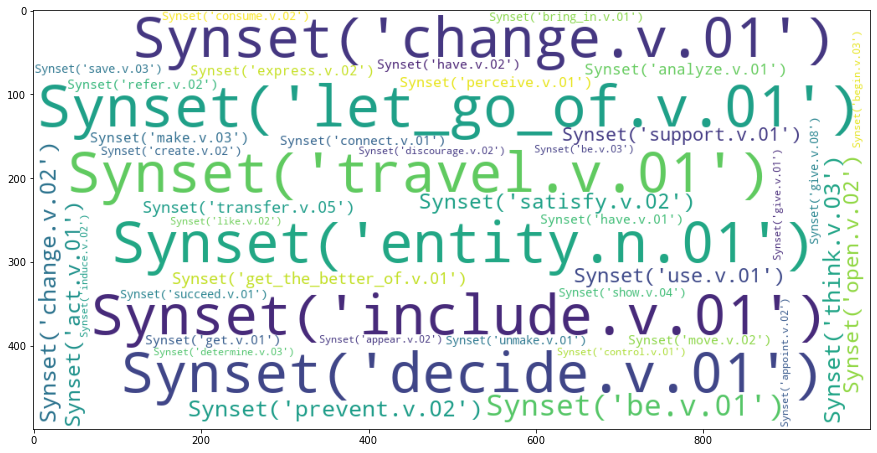

In [573]:
visualisation(categorizePreg)

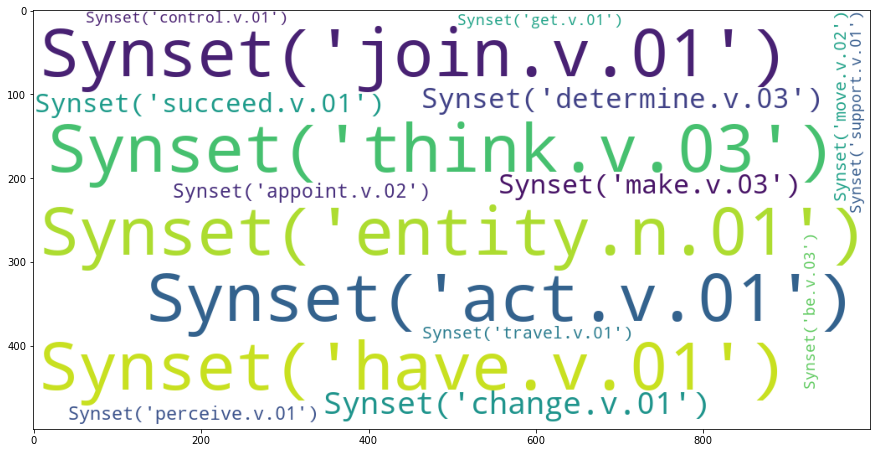

In [574]:
visualisation(categorizeEld)

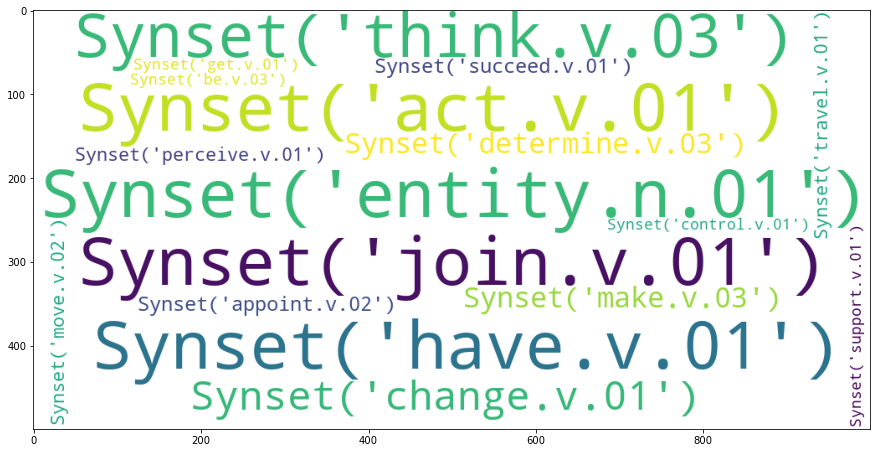

In [575]:
visualisation(categorizeID)

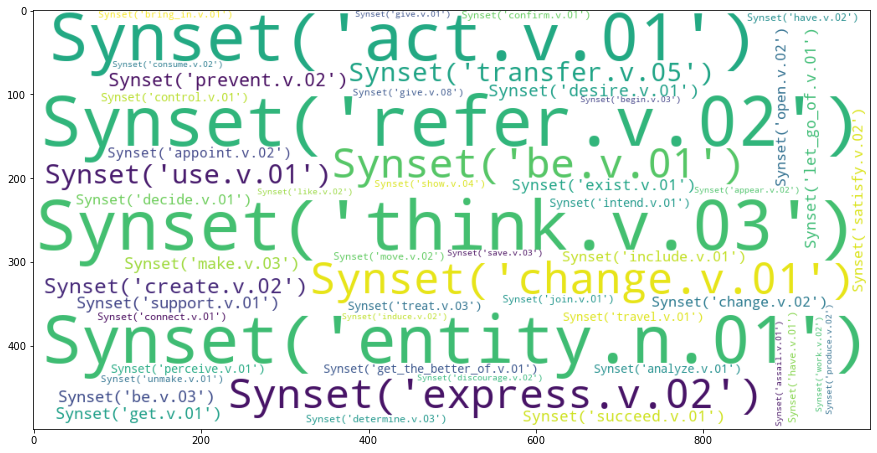

In [576]:
visualisation(categorizeAyush)

In [577]:
categorizerHypernyms(pregnantWomenToken)

{'inactivated': Synset('let_go_of.v.01'),
 'EDTA': Synset('entity.n.01'),
 'substance': Synset('entity.n.01'),
 'containing': Synset('include.v.01'),
 'S': Synset('entity.n.01'),
 'temperature': Synset('entity.n.01'),
 'permission': Synset('entity.n.01'),
 'follows': Synset('travel.v.01'),
 'choose': Synset('decide.v.01'),
 'Developing': Synset('entity.n.01'),
 'size': Synset('entity.n.01'),
 'events': Synset('entity.n.01'),
 'follow': Synset('travel.v.01'),
 'up': Synset('change.v.01'),
 'necessary': Synset('entity.n.01'),
 'remain': Synset('be.v.01'),
 'protected': Synset('prevent.v.02'),
 'mutated': Synset('change.v.02'),
 'expected': Synset('think.v.03'),
 'better': Synset('entity.n.01'),
 'going': Synset('entity.n.01'),
 'delayed': Synset('change.v.02'),
 'sweating': Synset('entity.n.01'),
 'discomfort': Synset('entity.n.01'),
 'reaction': Synset('entity.n.01'),
 'proven': Synset('be.v.01'),
 'affect': Synset('entity.n.01'),
 'district': Synset('entity.n.01'),
 'please': Synset('s

In [578]:
categorizerHypernyms(IDToken)

{'Document': Synset('entity.n.01'),
 'prescribed': Synset('act.v.01'),
 'identity': Synset('entity.n.01'),
 'documents': Synset('entity.n.01'),
 'recorded': Synset('have.v.01'),
 'Module': Synset('entity.n.01'),
 'level': Synset('entity.n.01'),
 'Public': Synset('entity.n.01'),
 'enlist': Synset('join.v.01'),
 'Information': Synset('entity.n.01'),
 'collected': Synset('have.v.01'),
 'regarding': Synset('think.v.03'),
 'completeness': Synset('entity.n.01'),
 'sources': Synset('entity.n.01'),
 'linkage': Synset('entity.n.01'),
 'finalize': Synset('change.v.01'),
 'identify': Synset('determine.v.03'),
 'undertake': Synset('make.v.03'),
 'managing': Synset('succeed.v.01'),
 'prepare': Synset('change.v.01'),
 'assigned': Synset('appoint.v.02'),
 'Organizing': Synset('make.v.03'),
 'observing': Synset('perceive.v.01'),
 'Advanced': Synset('travel.v.01'),
 'law': Synset('entity.n.01'),
 'situation': Synset('entity.n.01'),
 'Groups': Synset('entity.n.01'),
 'overcrowding': Synset('move.v.02'),

In [579]:
categorizerHypernyms(elderlyToken)

{'Document': Synset('entity.n.01'),
 'prescribed': Synset('act.v.01'),
 'identity': Synset('entity.n.01'),
 'documents': Synset('entity.n.01'),
 'recorded': Synset('have.v.01'),
 'Module': Synset('entity.n.01'),
 'level': Synset('entity.n.01'),
 'Public': Synset('entity.n.01'),
 'enlist': Synset('join.v.01'),
 'Information': Synset('entity.n.01'),
 'collected': Synset('have.v.01'),
 'regarding': Synset('think.v.03'),
 'completeness': Synset('entity.n.01'),
 'sources': Synset('entity.n.01'),
 'linkage': Synset('entity.n.01'),
 'finalize': Synset('change.v.01'),
 'identify': Synset('determine.v.03'),
 'undertake': Synset('make.v.03'),
 'managing': Synset('succeed.v.01'),
 'prepare': Synset('change.v.01'),
 'assigned': Synset('appoint.v.02'),
 'Organizing': Synset('make.v.03'),
 'observing': Synset('perceive.v.01'),
 'Advanced': Synset('travel.v.01'),
 'law': Synset('entity.n.01'),
 'situation': Synset('entity.n.01'),
 'Groups': Synset('entity.n.01'),
 'overcrowding': Synset('move.v.02'),

In [580]:
categorizerHypernyms(ayushToken)

{'involved': Synset('refer.v.02'),
 'tested': Synset('think.v.03'),
 'events': Synset('entity.n.01'),
 'period': Synset('entity.n.01'),
 'herd': Synset('entity.n.01'),
 'deferred': Synset('act.v.01'),
 'wait': Synset('entity.n.01'),
 'treating': Synset('act.v.01'),
 'minimize': Synset('change.v.01'),
 'fertility': Synset('entity.n.01'),
 'cases': Synset('entity.n.01'),
 'coagulation': Synset('entity.n.01'),
 'Information': Synset('entity.n.01'),
 'lactation': Synset('entity.n.01'),
 'Elderly': Synset('entity.n.01'),
 'inability': Synset('entity.n.01'),
 'Community': Synset('entity.n.01'),
 'essential': Synset('entity.n.01'),
 'trained': Synset('act.v.01'),
 'space': Synset('entity.n.01'),
 'proposed': Synset('express.v.02'),
 'comprise': Synset('be.v.01'),
 'way': Synset('entity.n.01'),
 'standard': Synset('entity.n.01'),
 'refer': Synset('think.v.03'),
 'coordinate': Synset('entity.n.01'),
 'populations': Synset('entity.n.01'),
 'Block': Synset('entity.n.01'),
 'event': Synset('entity

### Wordnet Lexical Catogorizer Analysis
This analysis examined the hypernyms of the words in the IndiaVax corpus. Hypernyms are words with broad meanings under which more words fall. Wordnet groups these hypernyms in synsets, which are sets of words correlated by nouns, verbs, adjectives, adverbs, synonyms, antonyms, and more. This tree like stacked understanding of the words in the text and their associations can help make better sense of the meaning and project of the text, which might not have been apparent at first glance. 

In order to better visualize the synsets of the texts in the IndiaVax corpus, I chose to use a word cloud. The world cloud displays words related to their frequency -- the more frequent the word, the bigger it will appear on the cloud. Broadly, the most common synset across the texts is "entity". Since entity is a very broad category since it means something with a distinct and independent existence, many words would fit under that category, regardless of topic. Thus, it is not that helpful in discerning the project of each text. It is ironic that one of the largest words in the word cloud of ID is 'join', since the document addresses the difficulties of those without documentation -- those who are not safely joined to the country. 

Interestingly, ayush, which is the memo about immunity and natural remedies, has many words in the synsets 'act', 'think', and 'change'. The 'change' is especially illuminating, as it reveals that many of the words in ayush are pushing for action and modification of routine. Thus, this synset helps us answer the question from earlier about what is the project of the state in making a memo about home remedies in the context of covid. Here, one can see that the government is not merely desribing the existence of home remedies, but really encouraging and recommending Yoga and Ayurvedic cures. When seen in the context of a rightwing government that has previously co-opted Yoga as a took of its violent Hindu nationalism, it is clear that these memos in fact represent a political project carried out through the rhetoric of public health.

In [581]:
A comparative sentiment analysis of each of the texts.

#this function takes in text and returns a sentiment analysis polarity score of the text
def sentimentAnalyzer(text):
    sentAn = SentimentIntensityAnalyzer()
    score = sentAn.polarity_scores(text)
    return score

In [582]:
sentAn.polarity_scores("covid") #testing to see how some common words in the corpus are scored 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [583]:
sentAn.polarity_scores("vaccine") #testing to see how some common words in the corpus are scored 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [584]:
sentAn.polarity_scores("disease") #testing to see how some common words in the corpus are scored 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [585]:
sentAn.polarity_scores("sick") #testing to see how some common words in the corpus are scored 

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}

In [586]:
 sentimentAnalyzer(pregnantWomen) 

{'neg': 0.067, 'neu': 0.843, 'pos': 0.09, 'compound': 0.9994}

In [587]:
sentimentAnalyzer(nationalGuidelines)

{'neg': 0.019, 'neu': 0.875, 'pos': 0.105, 'compound': 0.9985}

In [588]:
sentimentAnalyzer(elderly)

{'neg': 0.019, 'neu': 0.89, 'pos': 0.092, 'compound': 0.9992}

In [589]:
sentimentAnalyzer(ID)

{'neg': 0.019, 'neu': 0.889, 'pos': 0.092, 'compound': 0.9992}

In [590]:
sentimentAnalyzer(ayush)

{'neg': 0.048, 'neu': 0.849, 'pos': 0.104, 'compound': 1.0}

I was especially curious to do a sentiment analysis of this corpus because I was not sure at all what I would find. On one hand, these texts are government documents written in highly dry and impassionate prose. This hinted that the socres might be overall neutral. However, the topics of all the memos are about Covid, disease, illness, and disability. Thus, the content would suggest that the overall sentiment would be negative.

Sentiment analysis scores can be understood on a scale between -1 and 1. A -1 would mean the text is entirely negative. A one is entirely positive. Anything below a score of -0.05 is tagged as negative and anything above 0.05 is tagged as positive. Anything in between inclusively is neutral. Extremely surpisingly, the compound scores of all the texts were really close to one. They were all above .99. This was surprising, so I began to test the sentiment analysis score of individual words would occur widely across the texts like "covid", "vaccine", and "disease". I saw that the analyzer actually labeled these words as neutral, though in my understanding I would classify "covid" and "disease" as negative. Although "disease" was neutral, it classified "sick" as negative. This would mean that since the texts are written in passive tense, even though they address topics of illness, death, and injury, those are probably classified as neutral, and thus do not balance out the general positive words, thus resulting in a really high positive score.

Interestingly, ayush got a perfect score of 1.0. I think this is because the analyzer probably struggled to evaluate a great many of the words in the text as they had to do with Indian homeopathy and Ayurvedic practice. Words like "Ritucharya" (seasonal regimes to maintain healthy life), "Chyavanprash" (an extremely popular but horrible tasting vitamin supplement, ubiquitously hated by kids), etc were deemed as neutral by the analyzer despite them posessing sentiment.